In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
with open('../multiplication/results/correlate/cp/rank50-25vals.json') as fp:
    data = np.array(json.load(fp))

In [3]:
def do_plot(data, title, sortkey, legendtitle=None):
    plt.figure(figsize=(5, 5))
    for name in sorted(data, key=sortkey):
        plt.plot(data[name][:, 0], data[name][:, 1], label=name)
    plt.legend(title=legendtitle)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Squared Error')
    plt.title(title)

In [4]:
def load_all(directory, name_func, subsample=16):
    filenames = os.listdir(directory)
    filenames = [os.path.join(directory, fname) for fname in filenames]
    all_data = {}
    for fname in filenames:
        with open(fname) as fp:
            data = np.array(json.load(fp))
            data = data[::subsample, ...]
        all_data[name_func(fname)] = data
    return all_data

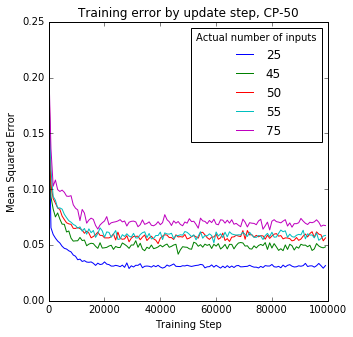

In [58]:
do_plot(load_all('../multiplication/momentum_results/correlate/cp/',
                 lambda x: os.path.basename(x)[-11:-9]),
       'Training error by update step, CP-50',
       None,
       legendtitle='Actual number of inputs')

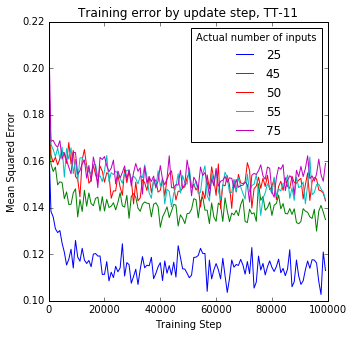

In [59]:
do_plot(load_all('../multiplication/momentum_results/correlate/tt/',
                 lambda x: os.path.basename(x)[-11:-9]),
       'Training error by update step, TT-11',
       None,
       legendtitle='Actual number of inputs')

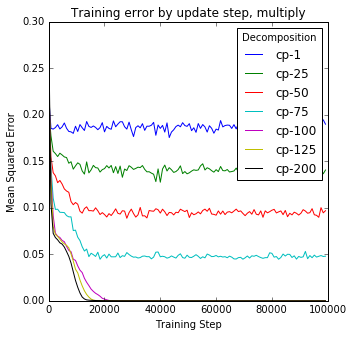

In [54]:
do_plot(load_all('../multiplication/momentum_results/multiply/cp/',
                 lambda x: 'cp-{}'.format(os.path.basename(x).split('.')[0][4:])),
       'Training error by update step, multiply',
       lambda x: int(x.split('-')[1]),
       legendtitle='Decomposition')

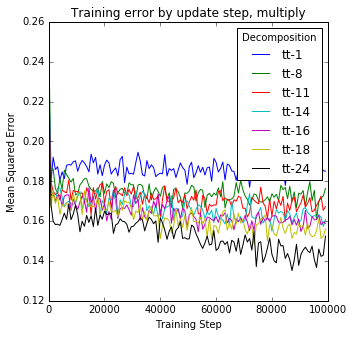

In [57]:
do_plot(load_all('../multiplication/momentum_results/multiply/tt/',
                 lambda x: 'tt-{}'.format(os.path.basename(x).split('.')[0][4:])),
       'Training error by update step, multiply',
       lambda x: int(x.split('-')[1]),
       legendtitle='Decomposition')

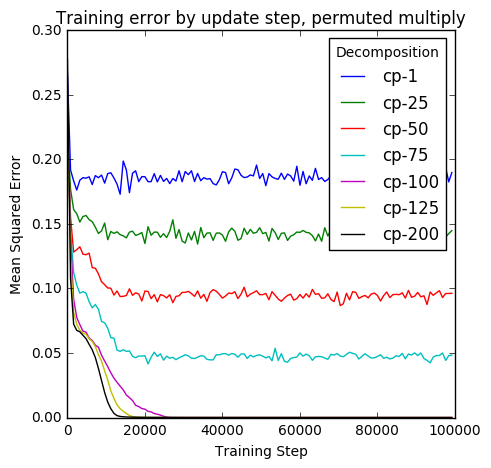

In [5]:
do_plot(load_all('../multiplication/momentum_results/permute_multiply/cp/',
                 lambda x: 'cp-{}'.format(os.path.basename(x).split('.')[0][4:])),
       'Training error by update step, permuted multiply',
       lambda x: int(x.split('-')[1]),
       legendtitle='Decomposition')

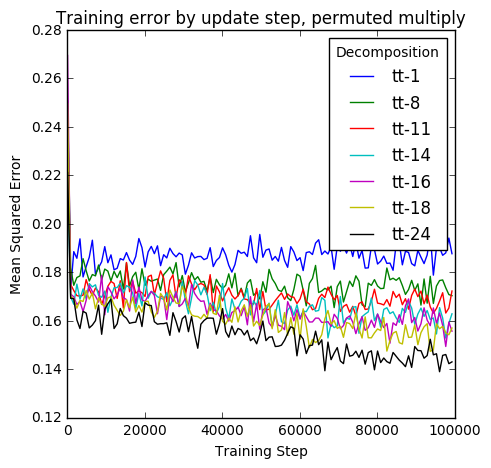

In [6]:
do_plot(load_all('../multiplication/momentum_results/permute_multiply/tt/',
                 lambda x: 'tt-{}'.format(os.path.basename(x).split('.')[0][4:])),
       'Training error by update step, permuted multiply',
       lambda x: int(x.split('-')[1]),
       legendtitle='Decomposition')